In [45]:
import pandas as pd
data= pd.read_csv(
    "winequalityN.csv",
    names=["type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])

threshold = 6  # Define your threshold

data['quality'] = (data['quality'] > threshold).astype(int)
data['type'] = data['type'].apply(lambda x: 0 if x=='white' else 1)
counts = data['quality'].value_counts()
target_count = min(counts)
balanced_data = pd.concat([
    data[data['quality'] == 0].sample(target_count, replace=True),
    data[data['quality'] == 1].sample(target_count, replace=True)
])
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data['quality'].value_counts()
data = balanced_data
features = data.copy()
features.fillna(0, inplace=True)
labels = features.pop('quality')
import numpy as np
features = np.array(features)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.05, random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000,solver='saga', penalty='elasticnet', l1_ratio=0.5)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
predictions_train = logmodel.predict(X_train)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.625


C:\Users\OZadorozhnyi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


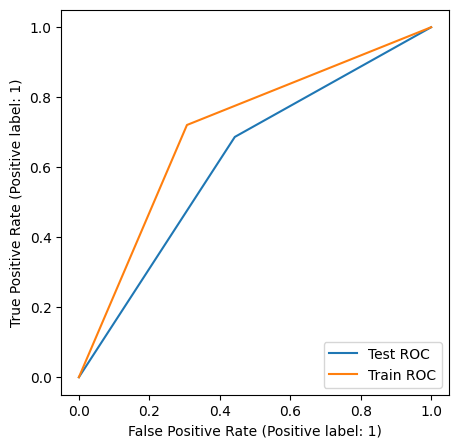

In [48]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
RocCurveDisplay.from_predictions(y_test,predictions, ax=ax, label='Test ROC')
RocCurveDisplay.from_predictions(y_train,predictions_train, ax=ax, label='Train ROC')

In [49]:
import sklearn
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[34, 27],
       [21, 46]], dtype=int64)

In [50]:
sklearn.metrics.f1_score(y_test,predictions,average=None)

array([0.5862069 , 0.65714286])

In [51]:
sklearn.metrics.roc_curve(y_test,predictions)

(array([0.        , 0.44262295, 1.        ]),
 array([0.        , 0.68656716, 1.        ]),
 array([inf,  1.,  0.]))